In [10]:
import numpy as np
import CADMium as cad
import matplotlib.pyplot as plt

a = 4.9322/2

Za = 2
Zb = 2

pol = 1

Nmo_a = [[1]]
Na   = [[2]]
nua  = 1

Nmo_b = [[1]]
Nb    = [[2]]
nub   = 1

Nmo = [[2]]
Nm  = [[4]]

optPartition = {"AB_SYM" : False,
                "ENS_SPIN_SYM" : True}

NP = 7
NM = [8,8]
L = np.arccosh(12/a)
loc = np.array(range(-4,5))

X = cad.Psgrid(NP, NM ,a, L, loc)
X.initialize()

ks = cad.Kohnsham(X, Za, Zb, pol, Nmo, Nm, {})
ks.scf({})


 Constructing integration weights ... 

 Building finite difference opperators ... 

 Factorizing Laplacian ... 

 Done
 iter    Total Energy     HOMO Eigenvalue         Res       

----------------------------------------------------------- 

   1         -7.240          -0.371            1.0
   2         -6.113          -0.516            0.18428606034884878
   3         -5.799          -0.553            0.054238112883415075
   4         -5.709          -0.562            0.015741666342969467
   5         -5.682          -0.565            0.00472065332586955
   6         -5.673          -0.565            0.00148123265082942
   7         -5.670          -0.565            0.0005827672726912776
   8         -5.670          -0.565            0.00014276662033261517
   9         -5.669          -0.565            6.954902872047711e-05
   10         -5.669          -0.565            3.4152013495897346e-05
   11         -5.669          -0.565            1.6850946398544286e-05
   12         -5.6

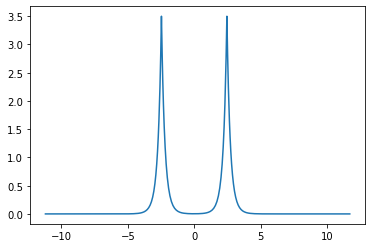

In [11]:
#Obtain and plot target density (LDA Density)
x, y = X.axis_plot(ks.n)
plt.plot(x,y)

In [12]:
#Set up Inversion
dm = ks.n

#Options
optInversion = {"invert_type" : "wuyang"}

#Set up objects
#Partition object required for initial guess
P  = cad.Pssolver( X, Nmo, Nm )
WY = cad.Inverter( X, P, optInversion )
part = cad.Partition( X, Za, Zb, pol, Nmo_a, Na, nua, Nmo_b, Nb, nub, {} )
part.optPartition["ISOLATED"] = True
part.scf()


In [14]:
#Get initial guess
phi0, e0, v0 = part.initialguessinvert(ispin=0) 
_, _ = WY.invert( dm, v0, phi0, e0, {} )

In [15]:
vs = WY.vs[:,0]

ks.set_veff_external(vs)
n_inv = ks.calc_density()

In [16]:
x_inv, y_inv = X.axis_plot(n_inv)

Comparison of target and scf density with inverted potential


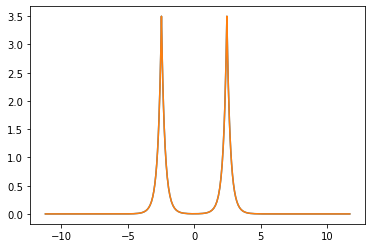

In [17]:
print("Comparison of target and scf density with inverted potential")
plt.plot(x_inv, y_inv)
plt.plot(x,y)

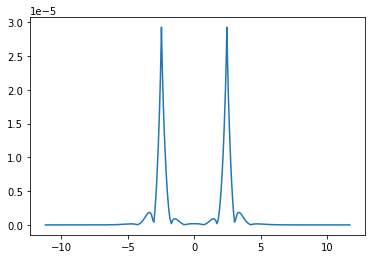

In [18]:
plt.plot( x, np.abs(y_inv-y))